
Logistic Regression Model Evaluation:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       127
           1       0.63      0.63      0.63        73

    accuracy                           0.73       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.73      0.73      0.73       200

ROC AUC Score: 0.7602200409880272

Decision Tree Model Evaluation:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       127
           1       0.79      0.84      0.81        73

    accuracy                           0.86       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.86      0.86      0.86       200

ROC AUC Score: 0.8548160931938302

Random Forest Model Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       127
           1       0.95      0.82      0.88        73

    accur

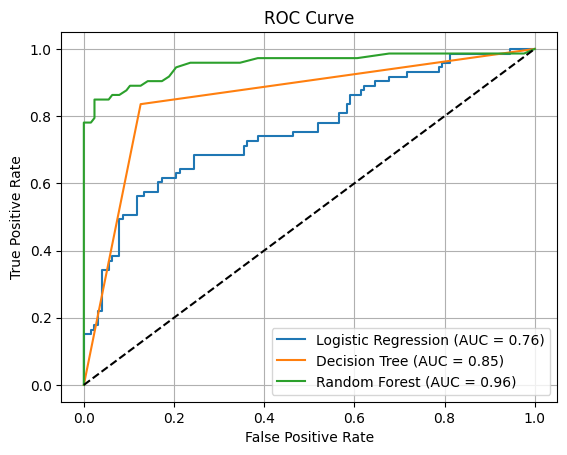

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=6, n_informative=4,
                           n_redundant=0, random_state=42, weights=[0.6, 0.4])

df = pd.DataFrame(X, columns=['income', 'debt', 'payment_history', 'age', 'credit_limit', 'monthly_spend'])
df['creditworthy'] = y

features = df.drop('creditworthy', axis=1)
target = df['creditworthy']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, target, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_preds = log_reg.predict(X_test)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

def evaluate_model(name, y_test, preds, probs):
    print(f"\n{name} Model Evaluation:")
    print(classification_report(y_test, preds))
    roc_auc = roc_auc_score(y_test, probs)
    print("ROC AUC Score:", roc_auc)
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

log_probs = log_reg.predict_proba(X_test)[:, 1]
dt_probs = dt.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]

evaluate_model("Logistic Regression", y_test, log_preds, log_probs)
evaluate_model("Decision Tree", y_test, dt_preds, dt_probs)
evaluate_model("Random Forest", y_test, rf_preds, rf_probs)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()
